# [intro] Creating Quantum Programs

* _Anton Karazeev_, you can text me: [anton.karazeev@gmail.com](mailto:anton.karazeev@gmail.com) or [t.me/akarazeev](t.me/akarazeev)
* Based on [QISKit tutorial](https://github.com/QISKit/qiskit-tutorial)

In [1]:
import os
import sys
from math import pi

from IPython.display import Image

import Qconfig
from qiskit import QuantumProgram
from qiskit.tools.visualization import plot_histogram

assert sys.version_info >= (3,5), "Only Python 3.5 or greater supported."

In [2]:
# Create your first QuantumProgram object instance.
Q_program = QuantumProgram()
Q_program.set_api(Qconfig.APItoken, Qconfig.config["url"])

# List of available backends.
Q_program.available_backends()

['ibmqx5',
 'ibmqx4',
 'ibmqx_hpc_qasm_simulator',
 'ibmqx2',
 'ibmqx_qasm_simulator',
 'local_projectq_simulator',
 'local_qasm_simulator',
 'local_clifford_simulator',
 'local_qiskit_simulator',
 'local_unitary_simulator']

In [3]:
# Check availability of backend.
Q_program.get_backend_status('ibmqx_hpc_qasm_simulator')

{'backend': 'ibmqx_hpc_qasm_simulator'}

In [5]:
# Backend configuration.
Q_program.get_backend_configuration('ibmqx_hpc_qasm_simulator')

## Let's build a simple circuit

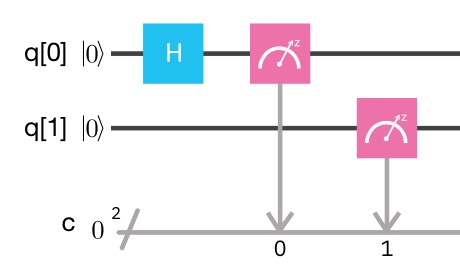

In [6]:
Image(filename='img/Screen Shot 2018-02-28 at 23.21.02.jpg', width=300)

In [7]:
n = 2  # Number of qubits.
q_registers = Q_program.create_quantum_register("q", n)
c_registers = Q_program.create_classical_register("c", n)

# Build a circuit.
circuit_name = 'single_h_circuit'
single_h = Q_program.create_circuit(circuit_name, [q_registers], [c_registers])
single_h.h(q_registers[0])
single_h.measure(q_registers[0], c_registers[0])

In [8]:
# Execute the quantum circuit `circuit_name`.
result = Q_program.execute([circuit_name], backend='ibmqx_hpc_qasm_simulator', shots=1024)
print(result)

COMPLETED


In [9]:
# Get data of experiment.
data = result.get_data(circuit_name)
data

{'additionalData': {'seed': 1865872434},
 'counts': {'00': 519, '01': 505},
 'creg_labels': 'c[2]',
 'date': '2018-02-28T20:26:58.050Z',
 'time': 0.0155535}

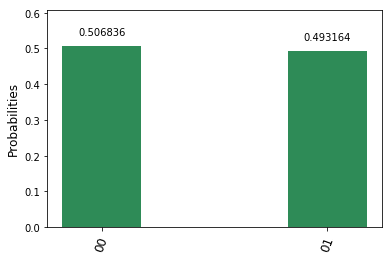

In [10]:
plot_histogram(data["counts"])

# More circuits

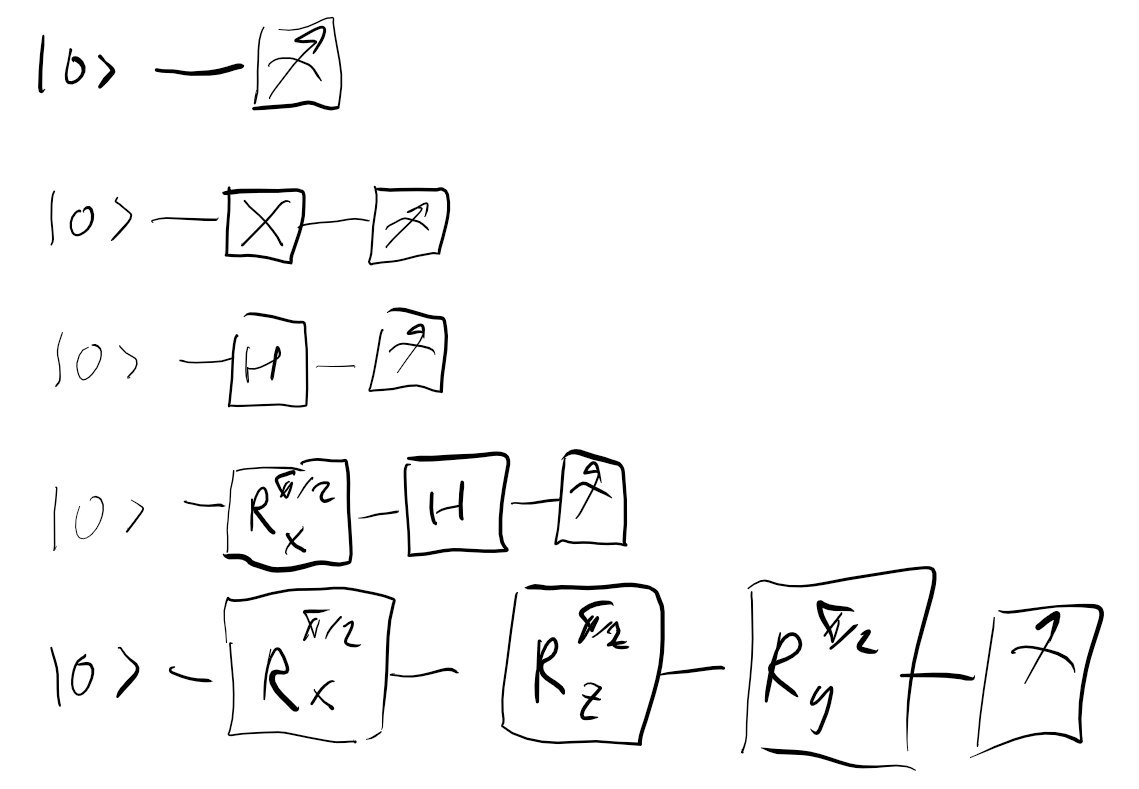

In [11]:
Image(filename="img/2018-02-28 21.57.31.jpg", width=300)

COMPLETED no_gates


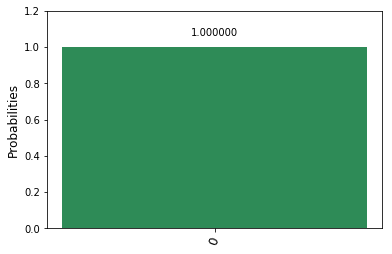

In [12]:
circuit_name = 'no_gates'

n = 1
q_regs = Q_program.create_quantum_register("q_" + circuit_name, n)
c_regs = Q_program.create_classical_register("c_" + circuit_name, n)

# Build a circuit.
circuit = Q_program.create_circuit(circuit_name, [q_regs], [c_regs])
circuit.measure(q_regs[0], c_regs[0])

# Execute the quantum circuit `circuit_name`.
result = Q_program.execute([circuit_name], backend='ibmqx_hpc_qasm_simulator', shots=1024)
print(result, circuit_name)

data = result.get_data(circuit_name)
plot_histogram(data["counts"])

COMPLETED x_gate


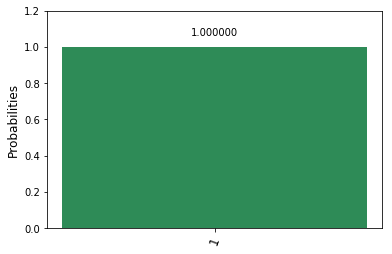

In [13]:
circuit_name = 'x_gate'

n = 1
q_regs = Q_program.create_quantum_register("q_" + circuit_name, n)
c_regs = Q_program.create_classical_register("c_" + circuit_name, n)

# Build a circuit.
circuit = Q_program.create_circuit(circuit_name, [q_regs], [c_regs])
circuit.x(q_regs[0])
circuit.measure(q_regs[0], c_regs[0])

# Execute the quantum circuit `circuit_name`.
result = Q_program.execute([circuit_name], backend='ibmqx_hpc_qasm_simulator', shots=1024)
print(result, circuit_name)

data = result.get_data(circuit_name)
plot_histogram(data["counts"])

COMPLETED h_gate


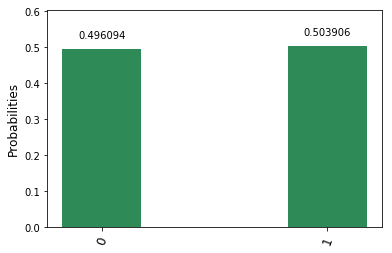

In [14]:
circuit_name = 'h_gate'

n = 1
q_regs = Q_program.create_quantum_register("q_" + circuit_name, n)
c_regs = Q_program.create_classical_register("c_" + circuit_name, n)

# Build a circuit.
circuit = Q_program.create_circuit(circuit_name, [q_regs], [c_regs])
circuit.h(q_regs[0])
circuit.measure(q_regs[0], c_regs[0])

# Execute the quantum circuit `circuit_name`
result = Q_program.execute([circuit_name], backend='ibmqx_hpc_qasm_simulator', shots=1024)
print(result, circuit_name)

data = result.get_data(circuit_name)
plot_histogram(data["counts"])

COMPLETED rx_h


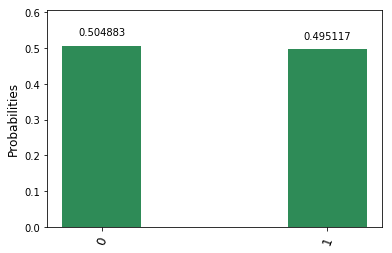

In [15]:
circuit_name = 'rx_h'

n = 1
q_regs = Q_program.create_quantum_register("q_" + circuit_name, n)
c_regs = Q_program.create_classical_register("c_" + circuit_name, n)

# Build a circuit.
circuit = Q_program.create_circuit(circuit_name, [q_regs], [c_regs])

# Set an angle for rotation.
theta = pi / 2
circuit.rx(theta, q_regs[0])
circuit.h(q_regs[0])
circuit.measure(q_regs[0], c_regs[0])

# Execute the quantum circuit `circuit_name`.
result = Q_program.execute([circuit_name], backend='ibmqx_hpc_qasm_simulator', shots=1024)
print(result, circuit_name)

data = result.get_data(circuit_name)
plot_histogram(data["counts"])

COMPLETED rx_ry_rz


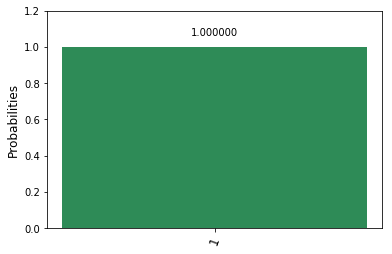

In [16]:
circuit_name = 'rx_ry_rz'

n = 1
q_regs = Q_program.create_quantum_register("q_" + circuit_name, n)
c_regs = Q_program.create_classical_register("c_" + circuit_name, n)

# Build a circuit.
circuit = Q_program.create_circuit(circuit_name, [q_regs], [c_regs])

# Set an angle for rotation.
theta = pi / 2
circuit.rx(theta, q_regs[0])
circuit.rz(theta, q_regs[0])
circuit.ry(theta, q_regs[0])
circuit.measure(q_regs[0], c_regs[0])

# Execute the quantum circuit `circuit_name`.
result = Q_program.execute([circuit_name], backend='ibmqx_hpc_qasm_simulator', shots=1024)
print(result, circuit_name)

data = result.get_data(circuit_name)
plot_histogram(data["counts"])